In [1]:
from tools import *


# People and places

In [2]:
# People and Places
t1_start = '2015-01-01'
t1_ends = '2015-12-31'

t2_start = '2020-01-01'
t2_ends = '2020-12-31'

t3_start = '2016-01-01'
t3_ends = '2016-12-31'
mask_source = "CGIAR/SRTM90_V4"
source = "projects/sat-io/open-datasets/ORNL/LANDSCAN_GLOBAL"

# ROI - Region of Interest
lon, lat = -73.9, 40.74 # New York City
width, height = 0.15, 0.16
region = ee.Geometry.Rectangle([lon+width, lat+height, lon-width, lat-height])
mask = ee.Image(mask_source).select('elevation').gt(0)
mask


/home/map10194/Documents/monitoring_cities/tools.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


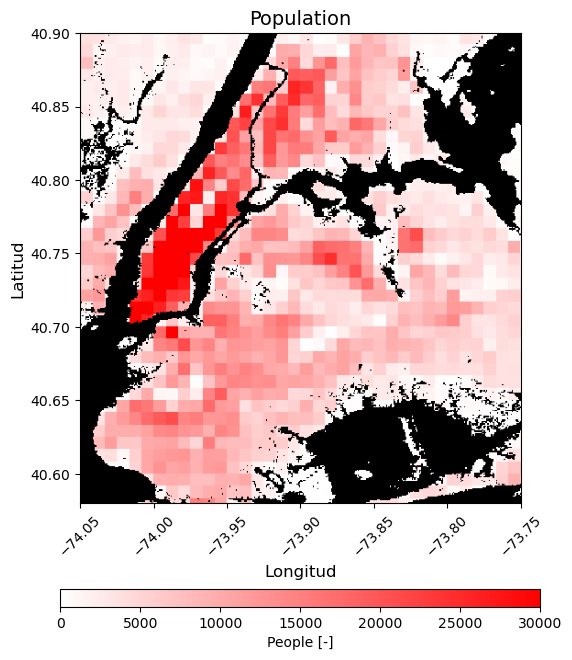

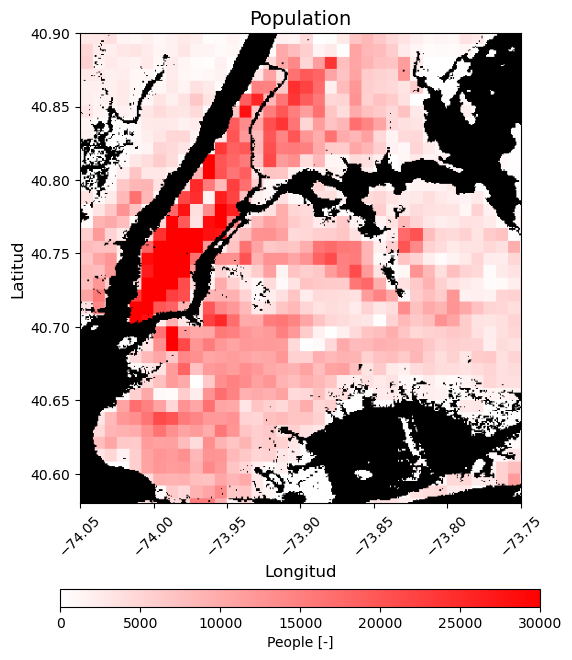

In [3]:
landScan = Collection(
    source=source,
    start_date=t1_start,
    end_date=t2_ends,
    boundaries=region,
    mask=mask,
)
landScan.get_event(t1_start, t1_ends, 'landScan_t1')
landScan.get_event(t2_start, t2_ends, 'landScan_t2')
landScan.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})

landScan.plot_event('landScan_t1','Population', legend_label=True)
landScan.plot_event('landScan_t2','Population', legend_label=True)


In [4]:
Landscan_projection = landScan.collection.first().projection()

In [5]:
landScan_usa_night = Collection(
    source='projects/sat-io/open-datasets/ORNL/LANDSCAN_USA_NIGHT',
    start_date=t1_start,
    end_date=t2_ends,
    boundaries=region,
    reprojection={'crs': Landscan_projection, 'scale': 1000},
    reducer=ee.Reducer.sum().unweighted(),
    mask=mask,
)
landScan_usa_night.get_event(t3_start, t3_ends, 'landScan_t1',type='moisac')
landScan_usa_night.get_event(t2_start, t2_ends, 'landScan_t2',type='moisac')
landScan_usa_night.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['whi

SyntaxError: unterminated string literal (detected at line 13) (1387706773.py, line 13)

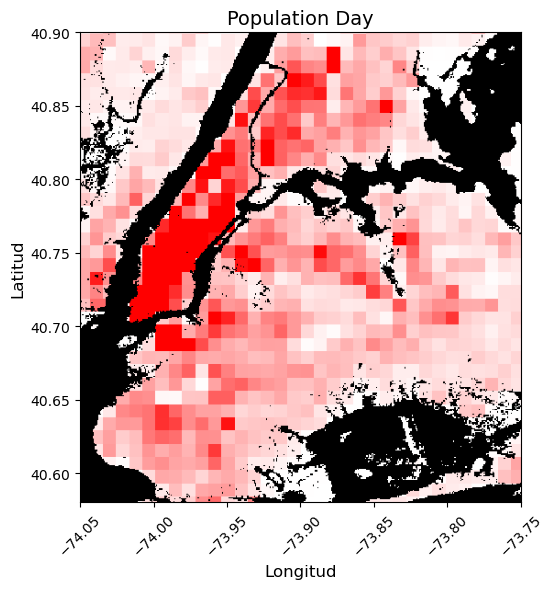

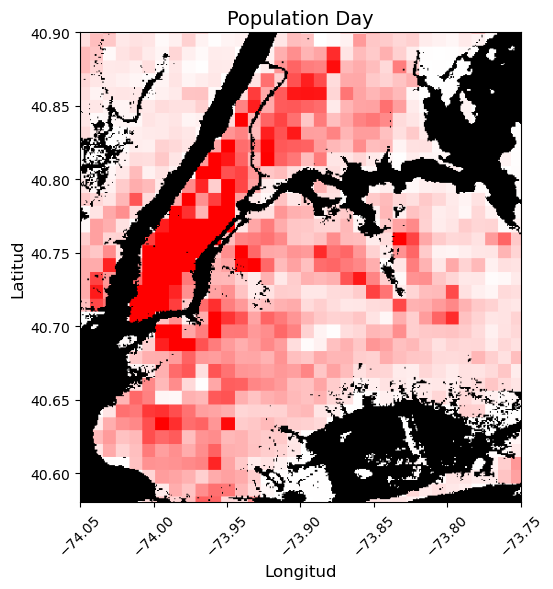

In [ ]:
landScan_usa_day = Collection(
    source='projects/sat-io/open-datasets/ORNL/LANDSCAN_USA_DAY',
    start_date=t1_start,
    end_date=t2_ends,
    boundaries=region,
    reprojection={'crs': Landscan_projection, 'scale': 1000},
    reducer=ee.Reducer.sum().unweighted(),
    mask=mask,
)
landScan_usa_day.get_event(t3_start, t3_ends, 'landScan_t1', type='moisac')
landScan_usa_day.get_event(t2_start, t2_ends, 'landScan_t2', type='moisac')
landScan_usa_day.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})

landScan_usa_day.plot_event('landScan_t1','Population Day', legend_label=False)
landScan_usa_day.plot_event('landScan_t2','Population Day', legend_label=False)


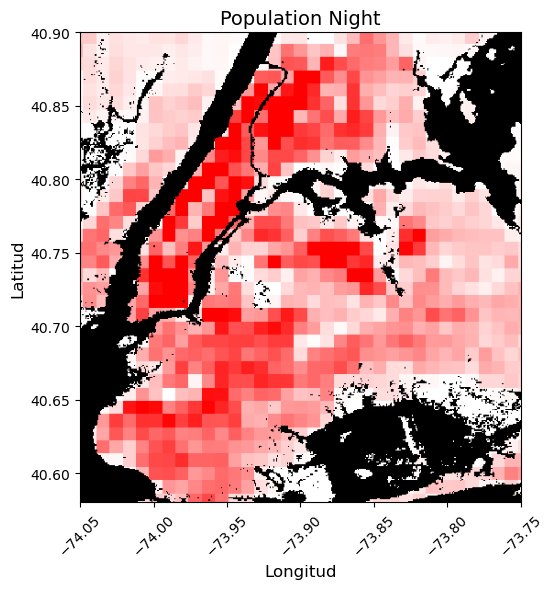

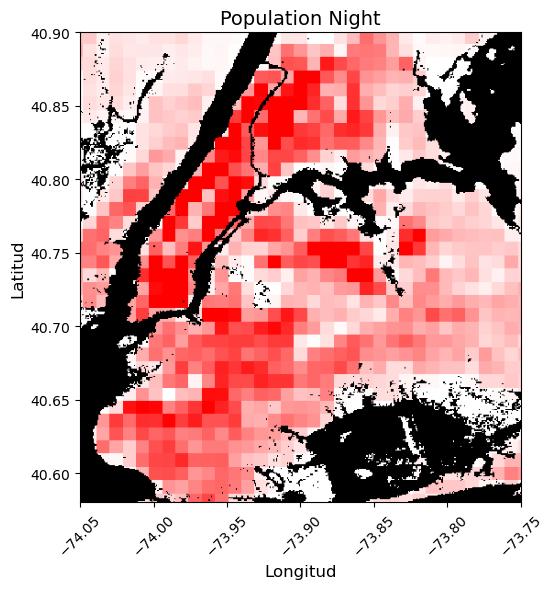

In [ ]:
GHS = Collection(
    source='JRC/GHSL/P2023A/GHS_POP',
    # start_date=t1_start,
    # end_date=t2_ends,
    boundaries=region,
    mask=mask,
    reprojection={'crs': 'EPSG:4326', 'scale': 1000},
    reducer=ee.Reducer.sum().unweighted()
)
GHS.get_event(t1_start, t1_ends, 'GHS_t1', type='first')
GHS.get_event(t2_start, t2_ends, 'GHS_t2', type='first')
GHS.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})
GHS.events['GHS_t1'].getInfo()
GHS.plot_event('GHS_t1','Population Night', legend_label=False)
GHS.plot_event('GHS_t2','Population Night', legend_label=False)


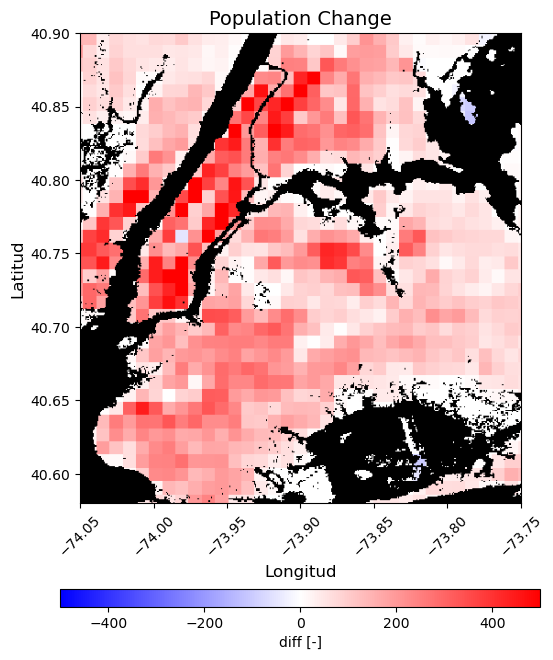

In [ ]:
GHS.get_diff_event('GHS_t1','GHS_t2','GHS_diff')
GHS.set_viz_params({'min': -500, 'max': 500, 'unit': '-','value': 'diff',
                   'palette': [ 'blue','white', 'red' ]})
GHS.plot_event('GHS_diff','Population Change', legend_label=True)

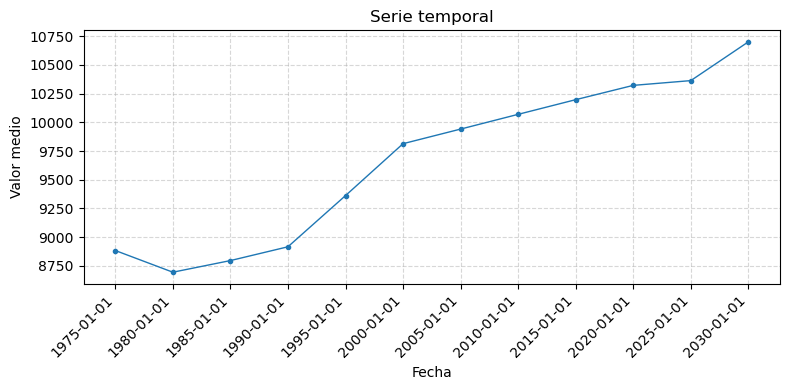

In [ ]:
GHS.plot_timeseries()

In [ ]:
ee.ImageCollection('JRC/GHSL/P2023A/GHS_POP').filterDate(None, 
                                                         None)

# Nightlights

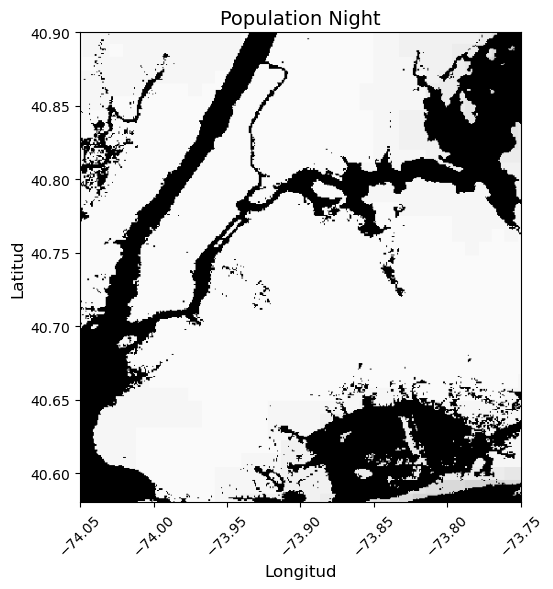

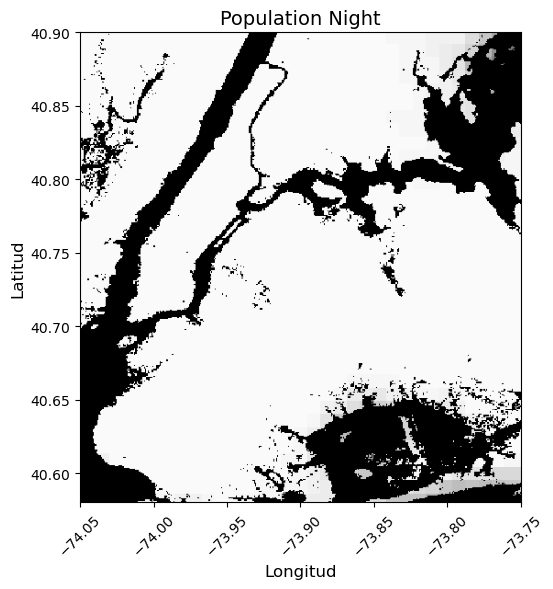

In [16]:
DMSP_T1_a = '1993-01-01'
DMSP_T1_b = '1993-12-31'
DMSP_T2_a = '2012-01-01'
DMSP_T2_b = '2012-12-31'
GHS = Collection(
    source='NOAA/DMSP-OLS/NIGHTTIME_LIGHTS',
    # start_date=t1_start,
    # end_date=t2_ends,
    boundaries=region,
    img='stable_lights',
    mask=mask,
    reprojection={'crs': 'EPSG:4326', 'scale': 1000},
    # reducer=ee.Reducer.sum().unweighted()
)
GHS.get_event(DMSP_T1_a, DMSP_T1_b, 'GHS_t1', type='mean')
GHS.get_event(DMSP_T2_a, DMSP_T2_b, 'GHS_t2', type='mean')
GHS.set_viz_params({'min': 10, 'max': 64, 'unit': '-','value': 'People',
})
                #    'palette': ['blue', 'white', 'red']})
GHS.events['GHS_t1'].getInfo()
GHS.plot_event('GHS_t1','Population Night', legend_label=False)
GHS.plot_event('GHS_t2','Population Night', legend_label=True)


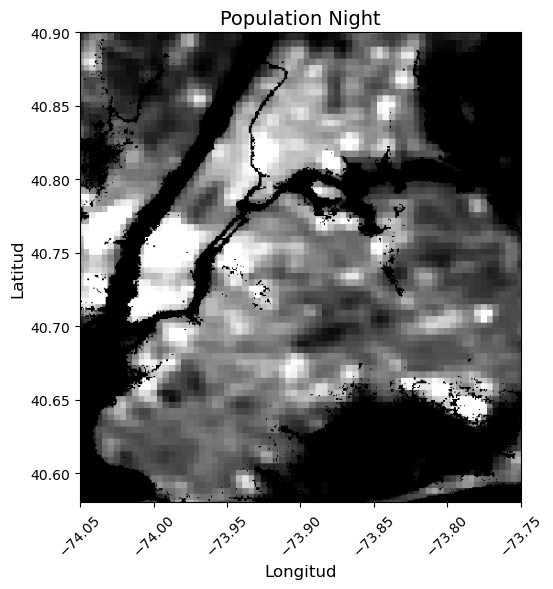

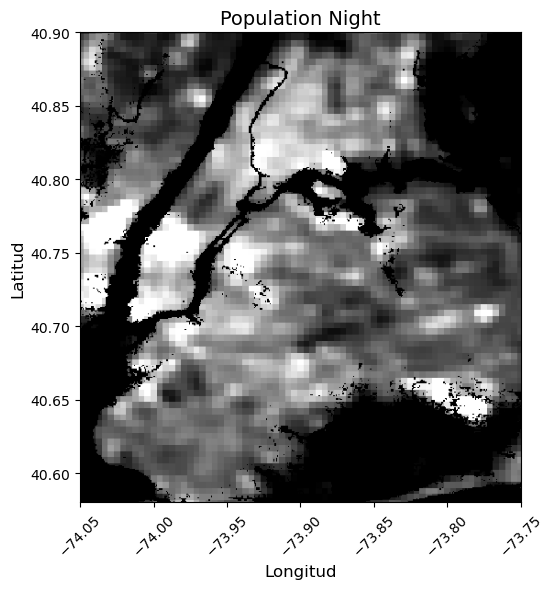

/home/map10194/Documents/monitoring_cities/tools.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


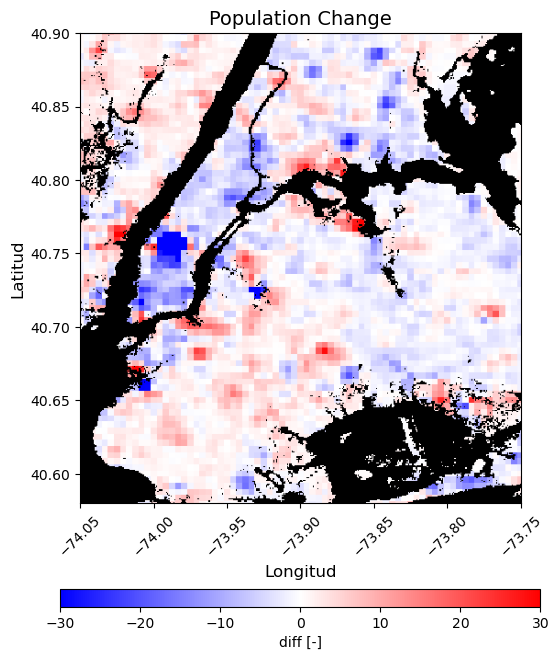

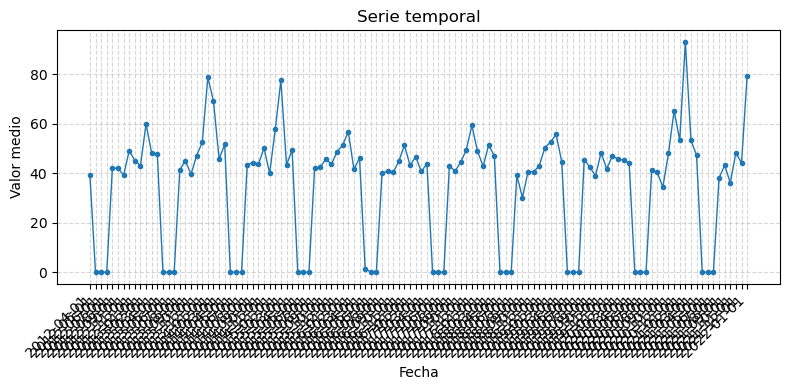

In [18]:
VIIRS_T1_a = '2017-01-01'
VIIRS_T1_b = '2017-12-31'
VIIRS_T2_a = '2020-01-01'
VIIRS_T2_b = '2020-12-31'

GHS = Collection(
    source='NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG',
    start_date='2012-04-01',
    end_date='2022-01-31',
    boundaries=region,
    img='avg_rad',
    mask=mask,
    # reprojection={'crs': 'EPSG:4326', 'scale': 1000},
    # reducer=ee.Reducer.sum().unweighted()
)
GHS.get_event(VIIRS_T1_a, VIIRS_T1_b, 'GHS_t1', type='mean')
GHS.get_event(VIIRS_T2_a, VIIRS_T2_b, 'GHS_t2', type='mean')
GHS.set_viz_params({'min': 10, 'max': 80, 'unit': '-','value': 'People',
})
                #    'palette': ['blue', 'white', 'red']})
GHS.events['GHS_t1'].getInfo()
GHS.plot_event('GHS_t1','Population Night', legend_label=False)
GHS.plot_event('GHS_t2','Population Night', legend_label=True)
GHS.get_diff_event('GHS_t1','GHS_t2','GHS_diff')
GHS.set_viz_params({'min': -30, 'max': 30, 'unit': '-','value': 'diff',
                   'palette': [ 'blue','white', 'red' ]})
GHS.plot_event('GHS_diff','Population Change', legend_label=True)
GHS.plot_timeseries()

# Surface Classification (NDVI)

In [19]:
T1_a = '2011-01-01'
T1_b = '2011-12-31'
T2_a = '2015-01-01'
T2_b = '2015-12-31'


S_T1_a = '2016-5-01'
S_T1_b = '2016-9-30'
S_T2_a = '2020-5-01'
S_T2_b = '2020-9-30'

L_T1_a = '2013-5-01'
L_T1_b = '2013-9-30'
L_T2_a = '2020-5-01'
L_T2_b = '2020-9-30'

In [20]:
# ROI - Region of Interest
lon, lat = -73.9363, 40.6656 # New York City
width, height = 0.025, 0.025
region = ee.Geometry.Rectangle([lon+width, lat+height, lon-width, lat-height])
mask = ee.Image(mask_source).select('elevation').gt(0)
mask


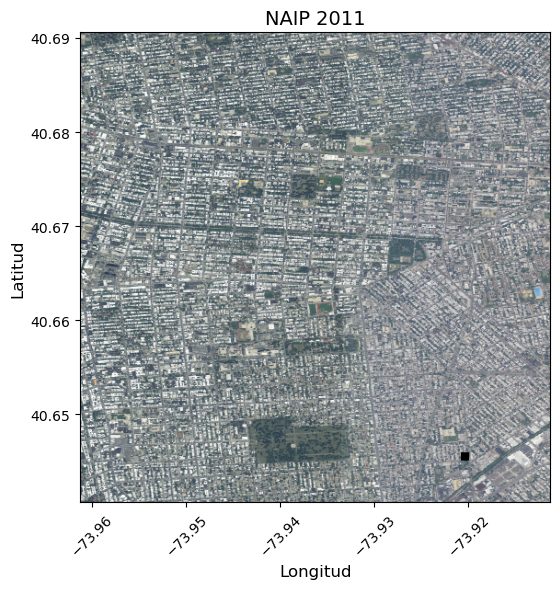

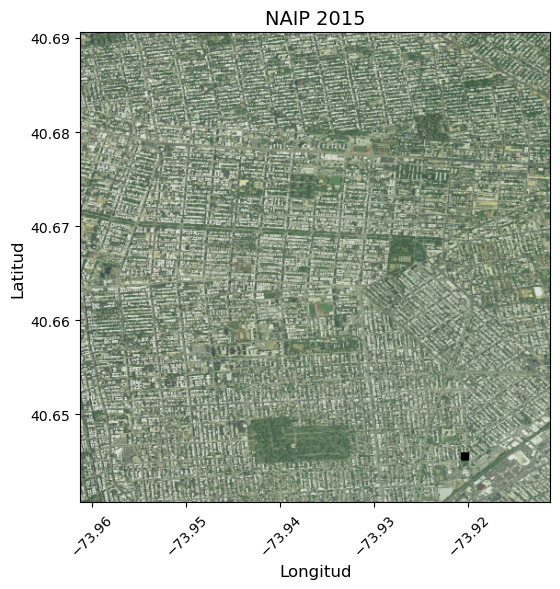

In [24]:
NAIP = Collection(
    source='USDA/NAIP/DOQQ',
    boundaries=region,
    mask=mask,
    # reprojection={'crs': 'EPSG:4326', 'scale': 1000},
    # reducer=ee.Reducer.sum().unweighted()
)
NAIP.get_event(T1_a, T1_b, '_t1', type='moisac')
NAIP.get_event(T2_a, T2_b, '_t2', type='moisac')
NAIP.set_viz_params({'min': 0, 'max': 255, 'unit': '-','value': 'People',
})
NAIP.plot_event('_t1','NAIP 2011', legend_label=False)
NAIP.plot_event('_t2','NAIP 2015', legend_label=True)
